In [1]:
pip install iisignature

     |████████████████████████████████| 1.3MB 2.8MB/s 
  Created wheel for iisignature: filename=iisignature-0.24-cp36-cp36m-linux_x86_64.whl size=2527506 sha256=d2248e29af8f8327c530f4da62abee9896ad8e197193be7cb7f9590adcc37826
  Stored in directory: /root/.cache/pip/wheels/57/33/98/2b03151aa0378df847a71a66ab6ed8f7594d310e11dcd60ed7
Successfully built iisignature


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import iisignature
import os

In [3]:
## Save future files to your drive
## In this notebook control for multiple testing
import numpy as np
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive/DQN"

Mounted at /content/drive
/content/drive/My Drive/DQN


In [ ]:
# bulid file to save model
try:
    os.mkdir("Model")
    print ("成功创建目录")
except:
    pass
sns.set()

In [4]:
# Define the function to calculate sharpe ratio 
def sharpe_ratio(daily_return):
  dql_sharpe_ratio = []
  for i in range(len(daily_return)-1):
    dql_sharpe_ratio.append((daily_return[i+1]-daily_return[i])/daily_return[i])
  dql_sharpe_ratio=np.array(dql_sharpe_ratio)
  mean_return=dql_sharpe_ratio.mean()
  std_return=dql_sharpe_ratio.std()
  sharpe_ratio=mean_return/std_return*np.sqrt(252)
  return sharpe_ratio

In [5]:
# Define the function to calculate maximum drwadown 
def MaxDrawdown(return_list):
    '''最大回撤率'''
    i = np.argmax((np.maximum.accumulate(return_list) - return_list) / np.maximum.accumulate(return_list))  # 结束位置
    if i == 0:
        return 0
    j = np.argmax(return_list[:i])  # 开始位置
    max_drawdown= (return_list[j] - return_list[i]) / (return_list[j])*100
    #plt.plot(return_list)
    #plt.plot([i, j], [return_list[i], return_list[j]], 'o', color="r", markersize=10)
    #plt.title('sharpe ratio %f,  maximum drawdown %f%%' %(sharpe_ratio(daily_return), max_drawdown ))
    #plt.legend()
    #plt.savefig('output-'+name+'-trade.png')
    #plt.show()
    return max_drawdown

1258


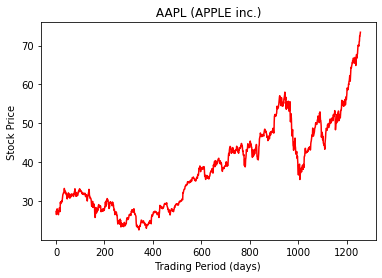

In [6]:
file_path = 'AAPL.csv'
df = pd.read_csv(file_path)
df = df.sort_values('Date', ascending=True)
print (len(df))
trend = df.Close.values.tolist() #选取收盘数据做测试
plt.plot(trend, color="r", linewidth=1.5)
plt.xlabel(" Trading Period (days) ")
plt.ylabel(" Stock Price ")
plt.title(" AAPL (APPLE inc.) ")
plt.savefig('Figure 1')
plt.show()

1217


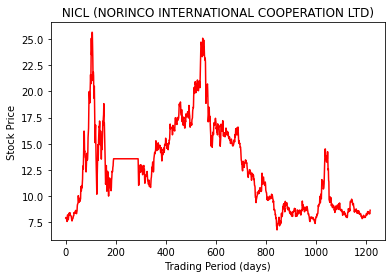

In [ ]:
file_path = '000065.SZ.csv'
df = pd.read_csv(file_path)
df = df.sort_values('Date', ascending=True)
print (len(df))
trend = df.Close.values.tolist() #选取收盘数据做测试
plt.plot(trend, color="r", linewidth=1.5)
plt.xlabel(" Trading Period (days) ")
plt.ylabel(" Stock Price ")
plt.title(" NICL (NORINCO INTERNATIONAL COOPERATION LTD) ")
plt.savefig('Figure 2')
plt.show()

#Deep Q-learning Agent - zero transaction fee

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
此时保存模型，此时最小cost为：0.203593
此时保存模型，此时最小cost为：0.19664915
此时保存模型，此时最小cost为：0.1964227
此时保存模型，此时最小cost为：0.19515492
此时保存模型，此时最小cost为：0.18807156
此时保存模型，此时最小cost为：0.15421824
此时保存模型，此时最小cost为：0.14902525
epoch:0, total_profit:3159.750
此时保存模型，此时最小cost为：0.1082012
此时保存模型，此时最小cost为：0.10660111
此时保存模型，此时最小cost为：0.09533018
此时保存模型，此时最小cost为：0.09419017
epoch:1, total_profit:1211.500
此时保存模型，此时最小cost为：0.093230195
此时保存模型，此时最小cost为：0.08779851
此时保存模型，此时最小cost为：0.0817253
此时保存模型，此时最小cost为：0.07588802
epoch:2, total_profit:3486.250
此时保存模型，此时最小cost为：0.07497972
此时保存模型，此时最小cost为：0.07452169
此时保存模型，此时最小cost为：0.06876996
此时保存模型，此时最小cost为：0.062994115
epoch:3, total_profit:4937.999
此时保存模型，此时最小cost为：0.061500907
此时保存模型，此时最小cost为：0.05538698
epoch:4, total_profit:5958.500
此时保存模型，此时最小cost为：0.051032048
此时保存模型，此时最小cost为：0.04133734

No handles with labels found to put in legend.


epoch:9, total_profit:5623.749


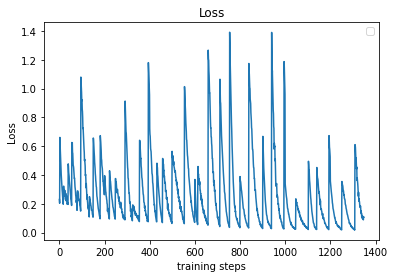

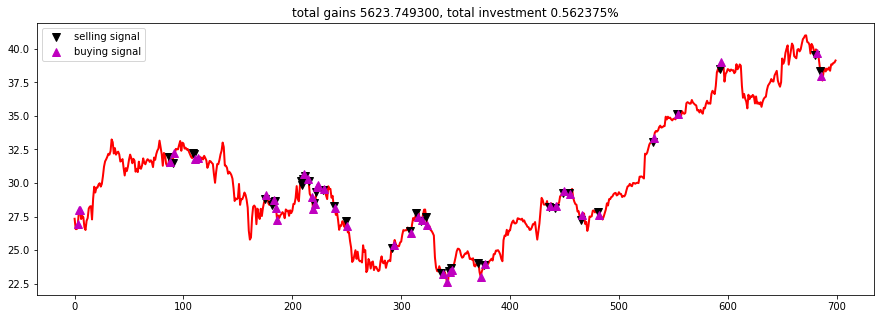

In [6]:
from stock_env_zero_sig import stock
from RL_brain import DeepQNetwork


def game_step(observation, step=None, train=True): # inner loop of the algorithm
    
    # RL choose action based on observation DQN 根据观测值选择行为
    action = RL.choose_action(observation, train)

    # RL take action and get next observation and reward  环境根据行为给出下一个 state, reward, 是否终止
    observation_, reward, done = env.step(action)

    # DQN 存储记忆
    RL.store_transition(observation, action, reward, observation_) 
    # print("total profit:%.3f" % env.total_profit, end='\r')

    # 控制学习起始时间和频率 (先累积一些记忆再开始学习)
    if step and (step > 200) and (step % 5  == 0):
        RL.learn()

    # swap observation 将下一个 state_ 变为 下次循环的 state
    observation = observation_
    
    return observation, done
    

def run(max_round): # outside loop of the algorithm
    step = 0    # 用来控制什么时候学习
    for episode in range(max_round):
        # initial observation  初始化环境
        observation = env.reset()

        while True:
            
            observation, done = game_step(observation, step=step)   # 输入当前状态，调用game_step函数，选取动作，环境根据行为给出下一个 state, reward, 是否终止
            # print(observation)
            # break while loop when end of this episode 如果终止, 就跳出当前episode的循环
            if done:
                break
            step += 1  # 总步数
        
        print('epoch:%d, total_profit:%.3f' % (episode, env.total_profit))
        # BackTest(False)


def BackTest(env):
    observation = env.reset()
    step=0
    while True:
        observation, done = game_step(observation, train=False)
        # break while loop when end of this episode
        if done:
            break
    #print('total_profit:%.3f' % (env.total_profit))
    return env


if __name__ == "__main__":
    max_round = 10
    file_path = 'AAPL.csv'
    df = pd.read_csv(file_path)
    df = df.sort_values('Date', ascending=True)
    trend = df.Close.values.tolist() #选取收盘数据做测试
    env = stock(trend[0:700])
    RL = DeepQNetwork(env.n_actions, env.n_features,
                      learning_rate=0.01,
                      reward_decay=0.9,
                      e_greedy=0.9,
                      replace_target_iter=200,
                      batch_size=512,
                      memory_size=4000,
                      # output_graph=True
                      )
    run(max_round)
    #env = stock(trend[0:1000])
    #test = df1.values.tolist()
    #env = stock(test[0:500])
    #env = BackTest(env, show_log=False)
    #name='lr=0.001, gamma=0.99, bs=200, ms=4000'
    name='lr=0.01, gamma=0.9, bs=512, ms=4000'
    RL.plot_cost()
    env.draw(name)
    
    


In [7]:
daily_return=env.get_info()[4] 
print (sharpe_ratio(daily_return))
print (MaxDrawdown(daily_return))

0.9161973387864395
22.46068618774523


In [8]:
TP=[]
SR=[]
MD=[]
for i in range (10):
  test=df.sample(n=360, frac=None, replace=False, weights=None, random_state=i, axis=None)
  trend = test.Close.values.tolist()
  env = stock(trend)
  env = BackTest(env)
  #name='lr=0.01, gamma=0.9, bs=512, ms=4000'
  #env.draw(name)
  daily_return=env.get_info()[4]
  SR.append(sharpe_ratio(daily_return))
  MD.append(MaxDrawdown(daily_return))
  TP.append(env.get_info()[5])

In [9]:
TP,SR,MD

([3327.751600000005,
  5091.248799999998,
  52.49989999999889,
  8967.500099999997,
  1608.249499999998,
  -1722.0008000000016,
  14025.001000000004,
  -1682.2497999999978,
  -1071.7491999999984,
  4324.999900000001],
 [2.747088223230265,
  2.640541489292682,
  2.3269754568956302,
  2.829782974270066,
  2.544123916282628,
  2.7684841938961844,
  2.6045646639707294,
  2.537422754077099,
  2.634079660491012,
  2.618391215754013],
 [64.96033900348584,
  65.96402959299019,
  69.50803287900575,
  68.34492007592165,
  69.37503542690241,
  70.78875739880345,
  66.53197622423977,
  76.06740979368217,
  70.8387228508092,
  76.8723540136152])

In [10]:
TP=np.array(TP)
SR=np.array(SR)
MD=np.array(MD)
print(TP.mean(),SR.mean(),MD.mean())

3292.1251 2.625145454816031 69.92515772594555


#Moving Average Agent - zero transaction fee

In [ ]:
#file_path = '000065.SZ_NormalData.csv'
#df_= pd.read_csv(file_path)
#df=df_['close'][0:1500]
name = 'Moving Average Agent'
def signals(df):
  short_window = 50 #int(0.025 * len(df))
  long_window = 200 #int(0.05 * len(df))
  df=df.reset_index(drop=True)
  signals = pd.DataFrame(index=df.index) #定义新的signals dataframe，其中index与我们导入的数据一样
  #signals #接下来要一列一列进行扩充signals
  signals['signal'] = 0.0 
  signals['short_ma'] = df.rolling(window=short_window, min_periods=1, center=False).mean()
  signals['long_ma'] = df.rolling(window=long_window, min_periods=1, center=False).mean()
  signals['signal'][short_window:] = np.where(signals['short_ma'][short_window:] > signals['long_ma'][short_window:], 1.0, 0.0)   
  signals['positions'] = signals['signal'].diff()
  return signals
#signals(df)[0:228]

In [ ]:
def buy_stock(
    real_movement,
    signal,              #这里的signal是对应上面siganl的position一列，给出买入卖出的信号1、-1
    initial_money = 10000,
    min_buy  = 100,
    min_sell = 100,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell       （1对应买，0代表卖）
    initial_money = 10000, ignore what kind of currency 
    max_buy = max quantity for share to buy   （购买的最大数量）
    max_sell = max quantity for share to sell （卖出的最大数量）
    """
    starting_money = initial_money
    market_value = 0
    stock_value = 0 
    states_sell = []
    states_buy = []
    daily_return = []
    current_inventory = 0 #现有库存
    #buy_rate = 0.0003  # 买入费率
    #buy_min = 5   # 最小买入费率
    #sell_rate = 0.0003  # 卖出费率
    #sell_min = 5  # 最大买入费率
    #stamp_duty = 0.001  # 印花税

    def buy(i, initial_money, current_inventory): 
        #shares = initial_money // real_movement[i]     #若剩余的initial money不够，则不能买入，//代表先做除法，再取floor，返回类型为float
        #if shares < 1:
        #    print(
        #        'day %d: total balances %f, not enough money to buy a unit price %f'
        #        % (i, initial_money, real_movement[i]) #%用于格式化字符串，这里real_movements代表实际价格
        #    )
        #else: #这里情况是可买股数大于等于1
        #    if shares > min_buy:    #即shares>100，此时可以买入
        #        buy_units = min_buy #买的单位设为min_buy,100股=1手
        #    else:                   #或shares<100
        #        buy_units = shares  #买的单位仍为1  
        # 买入股票数量
        buy_units = min_buy

        # 计算手续费等
        tmp_money = real_movement[i] * buy_units #买入股票的总价格
        #service_change = tmp_money * buy_rate  #券商的佣金
        #if service_change < buy_min: #不足5元，则以5元收取
        #    service_change = buy_min

        # 购买后，账户情况更新    
        initial_money = initial_money - tmp_money     #此时，initial_money代表剩余的金额=initial money-购买股票价格(手续费为0)
        current_inventory += buy_units                #现有的库存=原来的+增加的购买单位
        stock_value = current_inventory * real_movement[i]  # 持有股票总市值 = 现有的股票数量*买入当天股票价格
        #print(
        #        'day %d: buy %d units at price %f, total balance %f'
        #        % (i, buy_units, buy_units * real_movement[i], initial_money) 
        #    )
        states_buy.append(i)
        return initial_money, current_inventory           #buy函数返回的是，剩余的金额和现有库存

    def sell(i, initial_money, current_inventory):       
        # 卖出股票数量
        sell_units = min_sell 

        # 计算手续费等
        tmp_money = real_movement[i] * sell_units #卖出股票的总价格
        #service_change = tmp_money * sell_rate  #券商的佣金
        #if service_change < sell_min: #不足5元，则以5元收取
        #    service_change = sell_min
        #stamp = stamp_duty * tmp_money                 #印花税仅在卖出时收取，且=卖出股票的总价格*千分之一

        # 购买后，账户情况更新    
        initial_money = initial_money + tmp_money      #此时，initial_money代表剩余的金额=initial money+卖出股票价格
        current_inventory -= sell_units                #现有的库存=原来的+增加的购买单位
        stock_value = current_inventory * real_movement[i]  # 持有股票总市值 = 现有的股票数量*买入当天股票价格
        #print(
        #        'day %d: sell %d units at price %f, total balance %f'
        #        % (i, sell_units, sell_units * real_movement[i], initial_money) 
        #    )
        states_sell.append(i)
        return initial_money, current_inventory           #buy函数返回的是，剩余的金额和现有库存


    for i in range(real_movement.shape[0] - int(0.025 * len(df))):  #df.shape[0]=627- short window的长度15,这里的i代表着第几天，i=0不算因为为NAN 
        state = signal[i]                                           #state=signal[]这里是siganls['positions']，即代表了买入卖出的信号
        if state == 1 and initial_money >= real_movement[i]*100  :                                              #如果是买入信号，则余额和现有库存=对应 buy函数
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)                                    #并在states_buy中记录第几天进行买入操作
        elif state == -1 and current_inventory>0 :
            initial_money, current_inventory = sell(
                i, initial_money, current_inventory
            )                                                                             
        invest = ((initial_money - starting_money) / starting_money) * 100   #invest=（总的余额-刚开始的金额）/刚开始的金额 *100
        total_gains = initial_money - starting_money                        #即total profit=total gains=余额-刚开始的金额
        stock_value = current_inventory * real_movement[i]
        market_value = stock_value + initial_money
        daily_return.append(market_value) 
    return states_buy, states_sell, total_gains, invest, daily_return                 #返回买入的天数记录、卖出的天数记录、总获利、和获利比例

In [ ]:
file_path = 'AAPL.csv'
df= pd.read_csv(file_path)
df=df['Close'][800:]
df=df.reset_index(drop=True)
df

0      44.235001
1      44.994999
2      45.430000
3      44.992500
4      44.610001
         ...    
453    71.067497
454    72.477501
455    72.449997
456    72.879997
457    73.412498
Name: Close, Length: 458, dtype: float64

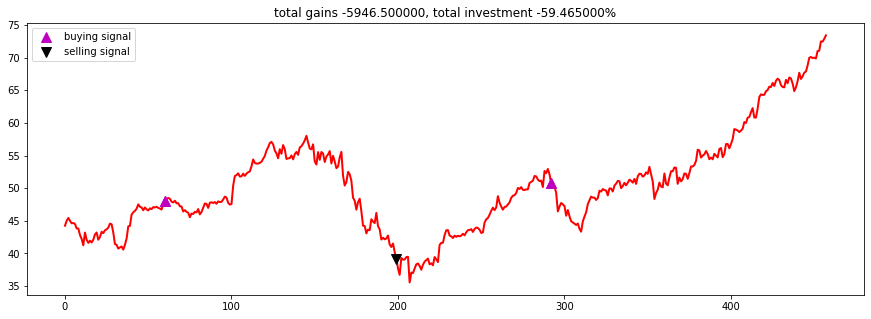

0.49791800804644915
23.805197641192112


In [ ]:
states_buy, states_sell, total_gains, invest, daily_return = buy_stock(df, signals(df)['positions']) #buy_stock是上面的外层函数，其中real_movement=df.close,而signal                                                                                     #对应signals['positions']
close = df
fig = plt.figure(figsize = (15,5)) #图的尺寸
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.savefig('output-'+name+'.png')
plt.show()
print (sharpe_ratio(daily_return))
print (MaxDrawdown(daily_return))

#Turtle Trading Agent - zero transaction fee

In [ ]:
#file_path = '000065.SZ_NormalData.csv'
#df_= pd.read_csv(file_path)
#df=df_['close'][0:1500]
#df=df.reset_index(drop=True)
#print(df)
name = 'Turtle Trading Agent'
#df.shape[0]
#int(0.025 * len(df))
#count = int(np.ceil(len(df) * 0.1))
def s(df):
  signals = pd.DataFrame(index=df.index)
  count = int(np.ceil(len(df) * 0.1)) #ceil函数取上整数，算出来count=32
  signals = pd.DataFrame(index=df.index)
  signals['signal'] = 0.0
  signals['trend'] = df
  signals['RollingMax'] = (signals.trend.shift(1).rolling(100).max()) #求前32个数中的最大值，并滚动
  signals['RollingMin'] = (signals.trend.shift(1).rolling(50).min()) #求前32个数中的最小值，并滚动
  signals.loc[signals['RollingMax'] < signals.trend, 'signal'] = 1     #若股票值超过上轨，则为买入信号，设为1
  signals.loc[signals['RollingMin'] > signals.trend, 'signal'] = -1      #若股票值低于下轨，则为卖出信号，设为-1
  return signals
#df = pd.Series(simulate_test_data(500))

In [ ]:
def buy_stock_t(
    real_movement,
    signal,              #这里的signal是对应上面siganl的position一列，给出买入卖出的信号1、-1
    initial_money = 10000,
    min_buy  = 100,
    min_sell = 100,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell       （1对应买，0代表卖）
    initial_money = 10000, ignore what kind of currency 
    max_buy = max quantity for share to buy   （购买的最大数量）
    max_sell = max quantity for share to sell （卖出的最大数量）
    """
    starting_money = initial_money
    market_value = 0
    stock_value = 0 
    states_sell = []
    states_buy = []
    daily_return = []
    current_inventory = 0 #现有库存
    #buy_rate = 0.0003  # 买入费率
    #buy_min = 5   # 最小买入费率
    #sell_rate = 0.0003  # 卖出费率
    #sell_min = 5  # 最大买入费率
    #stamp_duty = 0.001  # 印花税

    def buy(i, initial_money, current_inventory): 
        #shares = initial_money // real_movement[i]     #若剩余的initial money不够，则不能买入，//代表先做除法，再取floor，返回类型为float
        #if shares < 1:
        #    print(
        #        'day %d: total balances %f, not enough money to buy a unit price %f'
        #        % (i, initial_money, real_movement[i]) #%用于格式化字符串，这里real_movements代表实际价格
        #    )
        #else: #这里情况是可买股数大于等于1
        #    if shares > min_buy:    #即shares>100，此时可以买入
        #        buy_units = min_buy #买的单位设为min_buy,100股=1手
        #    else:                   #或shares<100
        #        buy_units = shares  #买的单位仍为1  
        # 买入股票数量
        buy_units = min_buy

        # 计算手续费等
        tmp_money = real_movement[i] * buy_units #买入股票的总价格
        #service_change = tmp_money * buy_rate  #券商的佣金
        #if service_change < buy_min: #不足5元，则以5元收取
        #    service_change = buy_min

        # 购买后，账户情况更新    
        initial_money = initial_money - tmp_money      #此时，initial_money代表剩余的金额=initial money-购买股票价格
        current_inventory += buy_units                #现有的库存=原来的+增加的购买单位
        stock_value = current_inventory * real_movement[i]  # 持有股票总市值 = 现有的股票数量*买入当天股票价格
        #print(
        #        'day %d: buy %d units at price %f, total balance %f'
        #        % (i, buy_units, buy_units * real_movement[i], initial_money) 
        #    )
        states_buy.append(i)
        return initial_money, current_inventory           #buy函数返回的是，剩余的金额和现有库存

    def sell(i, initial_money, current_inventory):       
        # 卖出股票数量
        sell_units = min_sell 

        # 计算手续费等
        tmp_money = real_movement[i] * sell_units #卖出股票的总价格
        #service_change = tmp_money * sell_rate  #券商的佣金
        #if service_change < sell_min: #不足5元，则以5元收取
        #    service_change = sell_min
        #stamp = stamp_duty * tmp_money                 #印花税仅在卖出时收取，且=卖出股票的总价格*千分之一

        # 购买后，账户情况更新    
        initial_money = initial_money + tmp_money      #此时，initial_money代表剩余的金额=initial money+购买股票价格
        current_inventory -= sell_units                #现有的库存=原来的+增加的购买单位
        stock_value = current_inventory * real_movement[i]  # 持有股票总市值 = 现有的股票数量*买入当天股票价格
        #print(
        #        'day %d: sell %d units at price %f, total balance %f'
        #        % (i, sell_units, sell_units * real_movement[i], initial_money) 
        #    )
        states_sell.append(i)
        return initial_money, current_inventory           #buy函数返回的是，剩余的金额和现有库存


    for i in range(real_movement.shape[0] - int(0.025 * len(df))):  #df.shape[0]=627- short window的长度15,这里的i代表着第几天，i=0不算因为为NAN 
        state = signal[i]                                           #state=signal[]这里是siganls['positions']，即代表了买入卖出的信号
        if state == 1 and initial_money >= real_movement[i]*100  :                                              #如果是买入信号，则余额和现有库存=对应 buy函数
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)                                    #并在states_buy中记录第几天进行买入操作
        elif state == -1 and current_inventory>0 :
            initial_money, current_inventory = sell(
                i, initial_money, current_inventory
            )                                                                             
        invest = ((initial_money - starting_money) / starting_money) * 100   #invest=（总的余额-刚开始的金额）/刚开始的金额 *100
        total_gains = initial_money - starting_money                        #即total profit=total gains=余额-刚开始的金额
        stock_value = current_inventory * real_movement[i]
        market_value = stock_value + initial_money
        daily_return.append(market_value) 
    return states_buy, states_sell, total_gains, invest, daily_return                 #返回买入的天数记录、卖出的天数记录、总获利、和获利比例

In [ ]:
file_path = 'AAPL.csv'
df= pd.read_csv(file_path)
df=df['Close'][800:]
df=df.reset_index(drop=True)
df

0      44.235001
1      44.994999
2      45.430000
3      44.992500
4      44.610001
         ...    
453    71.067497
454    72.477501
455    72.449997
456    72.879997
457    73.412498
Name: Close, Length: 458, dtype: float64

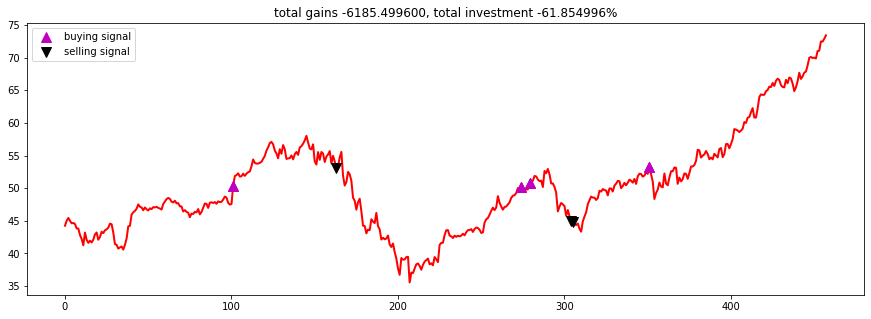

0.39226274066076644
19.659984306199025


In [ ]:
states_buy, states_sell, total_gains, invest, daily_return    = buy_stock_t(df, s(df)['signal']) #buy_stock是上面的外层函数，其中real_movement=df.close,而signal                                                                                     #对应signals['positions']
close = df
fig = plt.figure(figsize = (15,5)) #图的尺寸
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.savefig('output-'+name+'.png')
plt.show()
print (sharpe_ratio(daily_return))
print (MaxDrawdown(daily_return))